# Proyecto Mineria de Datos

Importar librerias básicas para el funcionamiento del proyecto:
    

In [86]:
import pandas as pd # para obtener la informacion del archivo csv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Leer archivo con informacion para la generación del dataset:

In [87]:
cervicalCancer = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

In [88]:
cervicalCancer.shape

(858, 36)

Descriptores estadísticos del dataset

In [89]:
pd.set_option('display.max_columns', None)
cervicalCancer.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.302545,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1296034a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x129d2f3c8>]], dtype=object)

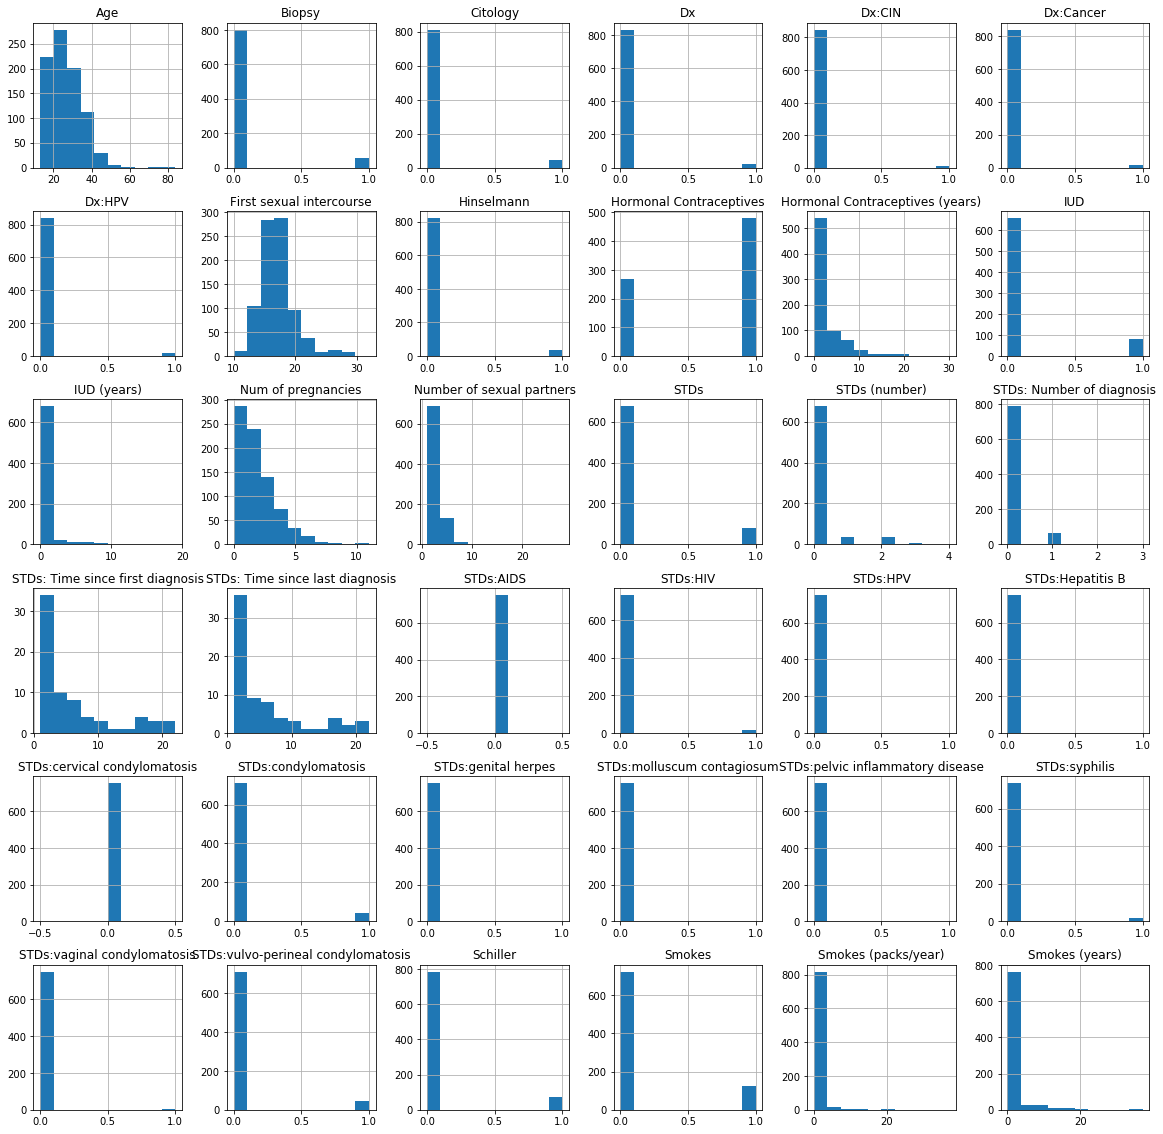

In [90]:
cervicalCancer.hist(figsize=(20,20))

## Preprocesamiento de los Datos

Para el pre-procesamiento inicial de los datos, se proceden a eliminar los siguientes valores:
* Las fechas de padecimiento de STDs: Por falta de información en estos dos atributos, se eliminan.

In [91]:
cervicalCancer.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)

Para los valores faltantes(NaN) se procede a usar la función **fillna** de pandas, bajo el siguiente método:
* pad: usa la ultima observación válida

In [92]:
cervicalCancer.fillna(method='pad',inplace=True)

In [93]:
cervicalCancer.shape

(858, 34)

Confirmemos que no tenemos valores perdidos o nulos en el dataset:

In [94]:
cervicalCancer.isnull().values.any()

False

## Selección de Atributos

Se separan los features de la clase. En nuestro set de datos Biopsy representa si se le hizo biopsia o no a la paciente.

In [95]:
X=cervicalCancer.drop('Biopsy',axis=1)
y=cervicalCancer['Biopsy']
print(X.shape)
print(y.shape)

(858, 33)
(858,)


Por medio de árboles de clasificación se obtiene un ranking de los features con mayor peso.

Ranking de atributos:
1. Atributo 31 Schiller (0.344210)
2. Atributo 30 Hinselmann (0.130459)
3. Atributo 0 Age (0.074435)
4. Atributo 2 First sexual intercourse (0.067912)
5. Atributo 8 Hormonal Contraceptives (years) (0.055449)
6. Atributo 1 Number of sexual partners (0.054187)
7. Atributo 32 Citology (0.052432)
8. Atributo 3 Num of pregnancies (0.050461)
9. Atributo 7 Hormonal Contraceptives (0.017214)
10. Atributo 5 Smokes (years) (0.016869)
11. Atributo 10 IUD (years) (0.015934)
12. Atributo 6 Smokes (packs/year) (0.015729)
13. Atributo 19 STDs:genital herpes (0.014970)
14. Atributo 9 IUD (0.010346)
15. Atributo 29 Dx (0.009471)
16. Atributo 27 Dx:CIN (0.009281)
17. Atributo 4 Smokes (0.009139)
18. Atributo 26 Dx:Cancer (0.008390)
19. Atributo 28 Dx:HPV (0.008339)
20. Atributo 12 STDs (number) (0.006339)
21. Atributo 25 STDs: Number of diagnosis (0.006252)
22. Atributo 22 STDs:HIV (0.005842)
23. Atributo 11 STDs (0.005077)
24. Atributo 17 STDs:syphilis (0.004924)
25. Atributo 13 S

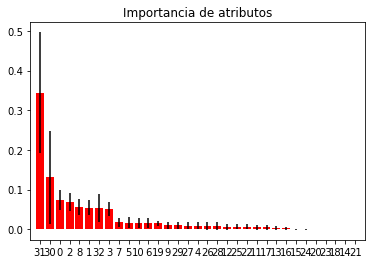

In [96]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Ranking de atributos:")

for f in range(X.shape[1]):
    print("%d. Atributo %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Importancia de atributos")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Se grafica el número de atributos vs el desempeno del clasificador, obteniendo el número óptimo de features.

Número óptimo de atributos: 7


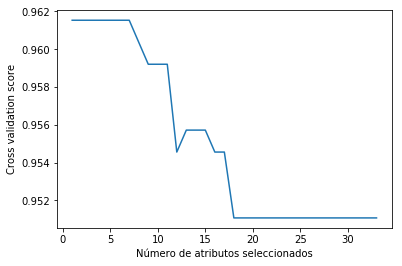

In [97]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X,y)

print("Número óptimo de atributos: %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Número de atributos seleccionados")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4F8ECFAC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002A4FC6291D0>]], dtype=object)

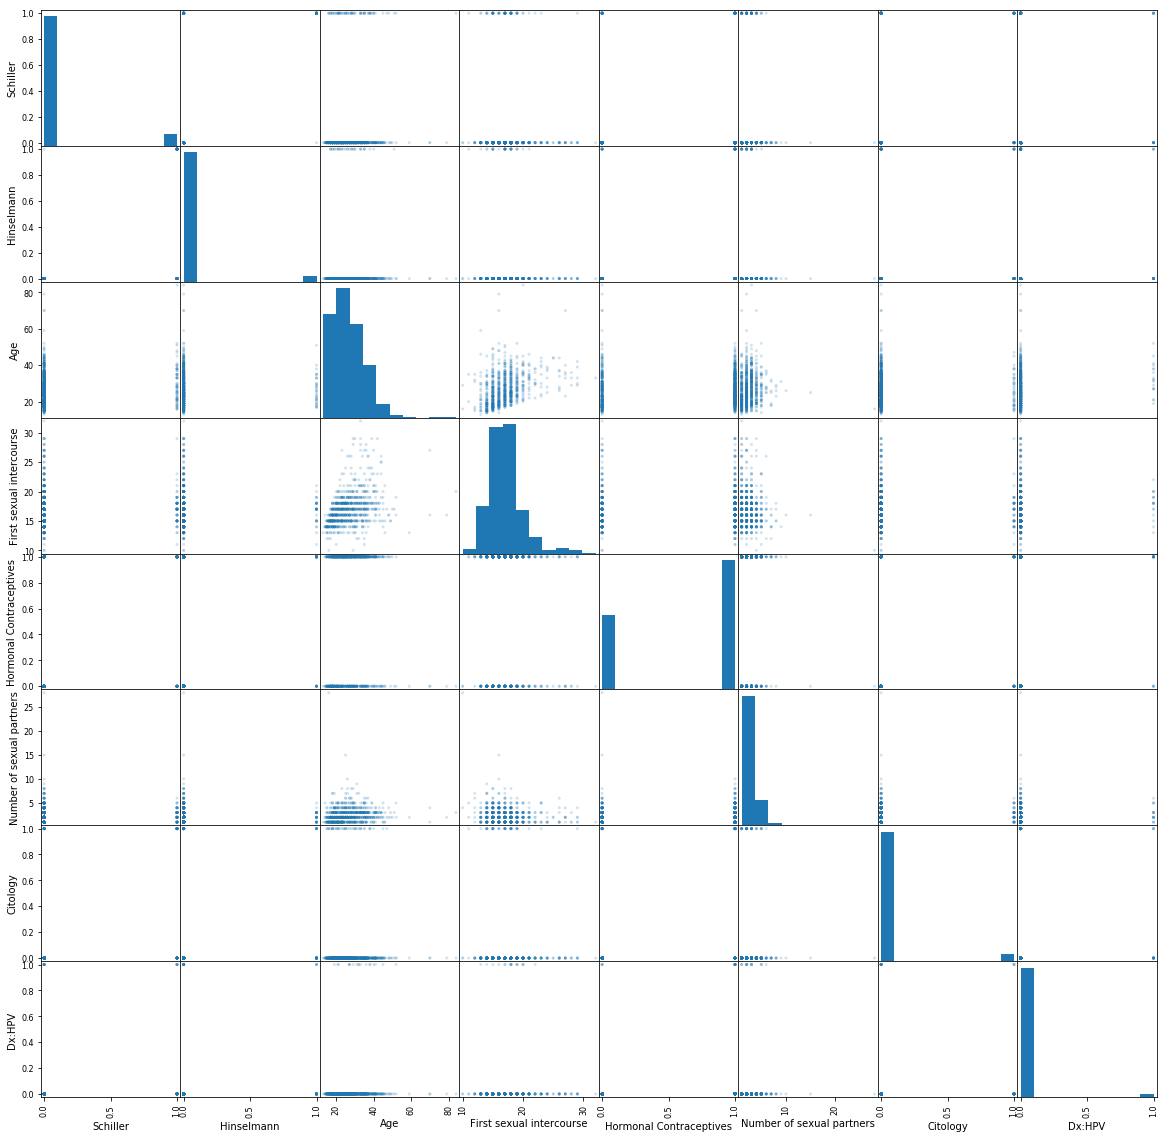

In [13]:
from pandas.plotting import scatter_matrix
df = cervicalCancer[['Schiller','Hinselmann','Age','First sexual intercourse','Hormonal Contraceptives','Number of sexual partners','Citology','Dx:HPV']]
scatter_matrix(df, alpha=0.2, figsize=(20, 20))

Procedemos a eliminar las variables menos importantes:

In [14]:
cervicalCancer.drop(['STDs:cervical condylomatosis', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:vaginal condylomatosis', 'STDs:genital herpes', 'STDs:Hepatitis B', 'STDs:AIDS', 'STDs:HPV'], axis=1, inplace=True)

Como método de clasificación inicial, utilizaremos un método no supervisado, por lo que no necesitaremos el nombre de la clase dentro del set de datos.

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cervicalCancer,test_size=0.3, random_state=5)
print (train.shape)
print (test.shape)

(600, 26)
(258, 26)


## Clasificación Supervisada

In [16]:
from sklearn.model_selection import train_test_split

X = cervicalCancer[['Schiller','Hinselmann','Age','First sexual intercourse','Hormonal Contraceptives','Number of sexual partners','Citology','Dx:HPV']]
y = cervicalCancer['Biopsy']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)
X_train.name = 'X_train'
X_test.name = 'X_test'
y_train.name = 'y_train'
y_test.name = 'y_test'
datasets=[X_train, X_test, y_train, y_test]
for i in datasets:
    print("{0} tiene la forma {1}".format(i.name, i.shape))

X_train tiene la forma (600, 8)
X_test tiene la forma (258, 8)
y_train tiene la forma (600,)
y_test tiene la forma (258,)


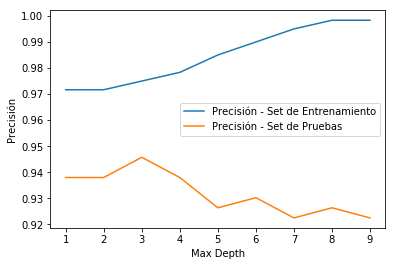

In [17]:
from sklearn.tree import DecisionTreeClassifier

training_acc = []
test_acc = []

depth = range(1, 10)
for d in depth:
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    training_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))
            
plt.plot(depth, training_acc, label="Precisión - Set de Entrenamiento")
plt.plot(depth, test_acc, label="Precisión - Set de Pruebas")
plt.ylabel("Precisión")
plt.xlabel("Max Depth")
plt.legend()

In [18]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

print("Valores finales para max_depth=3")
print("Precisión - Set de Entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión - Set de Pruebas: {:.3f}".format(tree.score(X_test, y_test)))

Valores finales para max_depth=3
Precisión - Set de Entrenamiento: 0.975
Precisión - Set de Pruebas: 0.946


Ya seleccionamos 1 parámetro para estabilizar el modelo y de acuerdo al gráfico anterior, se ve estable. Ahora necesitamos seleccionar una segunda variable, para validar el comportamiento que nuestro modelo tiene

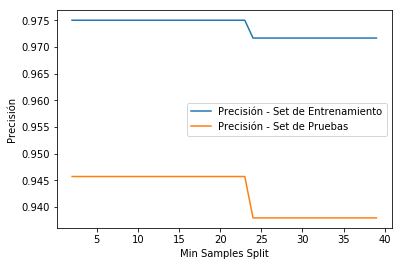

In [19]:
from sklearn.tree import DecisionTreeClassifier

training_acc = []
test_acc = []

min_samples = range(2, 40)
for m in min_samples:
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=m)
    tree.fit(X_train, y_train)
    training_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))
            
plt.plot(min_samples, training_acc, label="Precisión - Set de Entrenamiento")
plt.plot(min_samples, test_acc, label="Precisión - Set de Pruebas")
plt.ylabel("Precisión")
plt.xlabel("Min Samples Split")
plt.legend()

In [20]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=22)
tree.fit(X_train, y_train)

print("Valores finales para min_samples_split=22")
print("Precisión - Set de Entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión - Set de Pruebas: {:.3f}".format(tree.score(X_test, y_test)))

Valores finales para min_samples_split=22
Precisión - Set de Entrenamiento: 0.975
Precisión - Set de Pruebas: 0.946


## Clasificador ANN: Multi-layer Perceptron classifier 

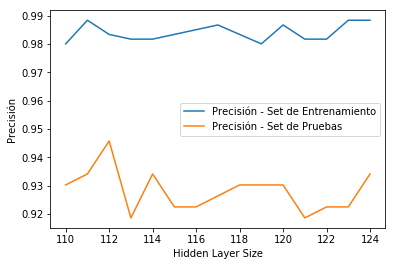

In [21]:
from sklearn.neural_network import MLPClassifier

training_acc = []
test_acc = []

hidden_layer_sizes_range = range(110,125)
for i in hidden_layer_sizes_range:
    clf = MLPClassifier(solver='lbfgs', activation='tanh', hidden_layer_sizes=(i, i),random_state=70)
    clf.fit(X_train, y_train)
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
            
plt.plot(hidden_layer_sizes_range, training_acc, label="Precisión - Set de Entrenamiento")
plt.plot(hidden_layer_sizes_range, test_acc, label="Precisión - Set de Pruebas")
plt.ylabel("Precisión")
plt.xlabel("Hidden Layer Size")
plt.legend()

In [22]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', activation='tanh', hidden_layer_sizes=[118, 118], random_state=70)
mlp.fit(X_train, y_train)

print("Precisión - Set de Entrenamiento: {:.3f}".format(mlp.score(X_train, y_train)))
print("Precisión - Set de Pruebas: {:.3f}".format(mlp.score(X_test, y_test)))

Precisión - Set de Entrenamiento: 0.983
Precisión - Set de Pruebas: 0.930


## Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(tree, X, y, cv=shuffle_split)
print("Scores de Cross-validation:\n{}".format(scores))

Scores de Cross-validation:
[ 0.96037296  0.95337995  0.96736597  0.95104895  0.94638695  0.96503497
  0.96270396  0.95804196  0.94871795  0.93939394]


In [24]:
print("Promedio cross-validation score: {:.2f}".format(scores.mean()))

Promedio cross-validation score: 0.96


In [25]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
loo = LeaveOneOut()
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=loo)
print("Iteraciones de CV: ", len(scores))
print("Precisión promedio: {:.2f}".format(scores.mean()))

Iteraciones de CV:  858
Precisión promedio: 0.96


## Clasificación No-Supervisada

### k-Means

Se utiliza k-Means como primer método de clasificación, definiendo 2 clusters como limite.

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Se aplica la predicción sobre el conjunto de datos

In [27]:
k_class_result = kmeans.predict(train)
print(k_class_result)

[1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0
 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1
 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 1 0 

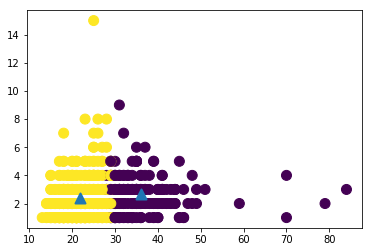

In [28]:
plt.scatter(train.values[:, 0], train.values[:, 1], c=k_class_result, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', s=100, linewidth=2)

### Test dataset

[0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1]


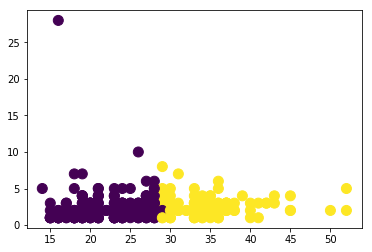

In [29]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(test)
k_class_test_result = kmeans.predict(test)
print(k_class_test_result)
plt.scatter(test.values[:, 0], test.values[:, 1], c=k_class_test_result, s=100)